In [1]:
import dicom2nifti
import pydicom
from src.utils.ImageUtils import ModifyImageForDicom, reshape_to_HW_slices
from src.utils.DicomUtils import ImageToDicom,fun, CreateSegForMRI
from src.utils.FileHandlingUtils import FindAllDCMSeries
from src.configuration.config import TempDCMseries, OutputFolder, OutputMRDir, VSmodelURL,CorrectNfityPath
import nibabel as nib
import os

In [2]:
Path = r'C:\Users\Rishabh\Downloads\GammaKnife_Rishabh_testData\GammaKnife_Rishabh_testData\GKPFX3707_2 - Copy'
Correctnii = nib.load(CorrectNfityPath)
OutputFileFolder = 'C:/Users/Rishabh/Documents/DICOMIZER/output'
output_file = os.path.join(OutputFileFolder, 'vs_gk_0000.nii.gz')

In [4]:
import numpy as np
files = sorted(os.listdir(Path))
New_MRI = []
for file in files:
    pixelarray = pydicom.dcmread(os.path.join(Path,file))
    pixelarray = pixelarray.pixel_array
    pixelarray = np.array(pixelarray, dtype=np.uint16)
    New_MRI.append(pixelarray)

New_MRI = np.stack(New_MRI, axis=2)    

In [9]:
nii_img = nib.Nifti1Image(New_MRI, Correctnii.affine)
nib.save(nii_img, output_file)

In [5]:
New_MRI.shape

(256, 256, 156)

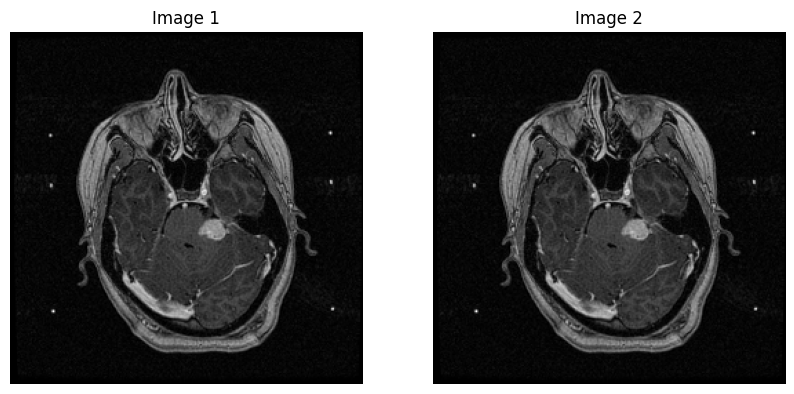

In [8]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Adjust figure size if needed

indx = 110
pixelarray = pydicom.dcmread(os.path.join(Path,files[indx]))
pixelarray = pixelarray.pixel_array

axes[0].imshow(pixelarray, cmap="gray")
axes[0].set_title("Image 1")
axes[0].axis("off")  # Hide axes


axes[1].imshow(New_MRI[:, :, indx], cmap="gray")  # Change the index as needed
axes[1].set_title("Image 2")
axes[1].axis("off")  # Hide axes

# Show both images
plt.show()


In [10]:
VSmodelURL = 'http://182.77.48.121:8000/predict/'

In [11]:
import requests
output_path = os.path.join(OutputFileFolder,"downloaded_file.nii.gz")
file_path = output_file
with open(file_path, "rb") as file:
    # Send the file to the API
    response = requests.post(VSmodelURL, files={"file": file})

    # Check if the request was successful
    if response.status_code == 200:
        # Save the returned file
        with open(output_path, "wb") as output_file:
            output_file.write(response.content)
        print(f"File saved as {output_path}")
    else:
        print(f"Failed to fetch the file. Status code: {response.status_code}")
        print(response.json())  # If the API sends error details

Perd = nib.load(output_path)
Perddata = Perd.get_fdata()

File saved as C:/Users/Rishabh/Documents/DICOMIZER/output\downloaded_file.nii.gz


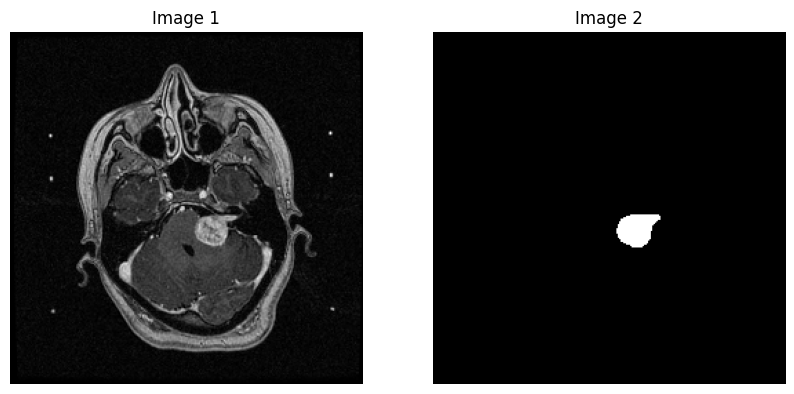

In [13]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Adjust figure size if needed

indx = 115
pixelarray = pydicom.dcmread(os.path.join(Path,files[indx]))
pixelarray = pixelarray.pixel_array

axes[0].imshow(pixelarray, cmap="gray")
axes[0].set_title("Image 1")
axes[0].axis("off")  # Hide axes


axes[1].imshow(Perddata[:, :, indx], cmap="gray")  # Change the index as needed
axes[1].set_title("Image 2")
axes[1].axis("off")  # Hide axes

# Show both images
plt.show()